In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import pandas_datareader
import datetime

In [3]:
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [5]:
tesla = web.DataReader('TSLA', 'yahoo', start, end)

In [6]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


In [7]:
ford = web.DataReader('F', 'yahoo', start, end)

In [8]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.836860
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.956559
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.160754
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.245250
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.308619


In [9]:
gm = web.DataReader('GM', 'yahoo', start, end)

In [10]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712


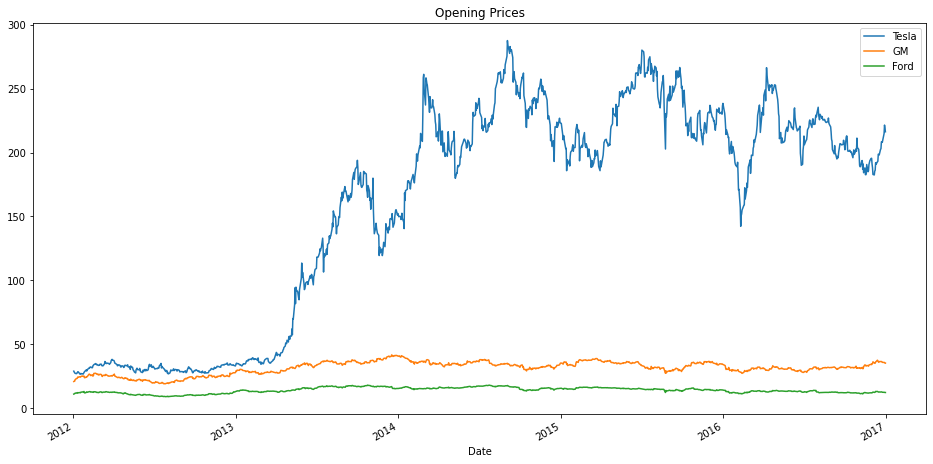

In [11]:
tesla['Open'].plot(label='Tesla', figsize=(16, 8), title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')

plt.legend()

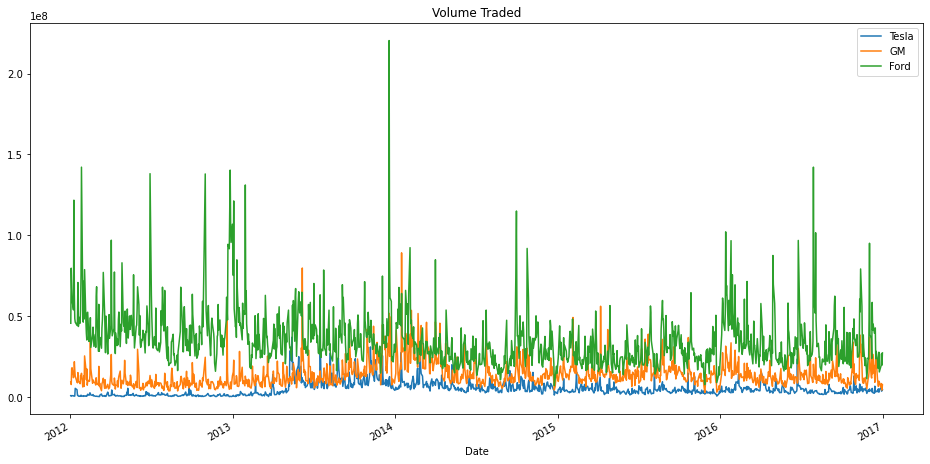

In [12]:
tesla['Volume'].plot(label='Tesla', figsize=(16, 8), title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')

plt.legend()

In [13]:
ford.index.values[ford['Volume'].argmax()]

# Ford had a huge spike in Late 2013. 
# Ford announcement : https://money.cnn.com/2013/12/18/news/companies/ford-profit/index.html 


numpy.datetime64('2013-12-18T00:00:00.000000000')

<AxesSubplot:xlabel='Date'>

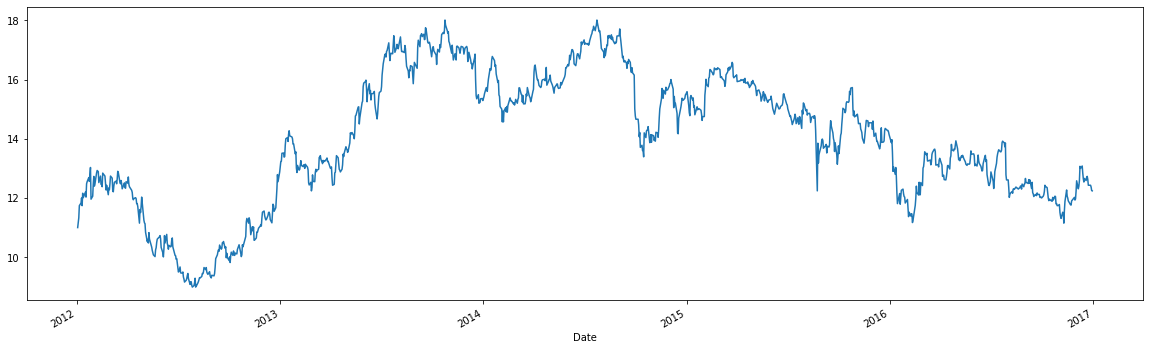

In [14]:
ford['Open'].plot(figsize=(20, 6))

In [15]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

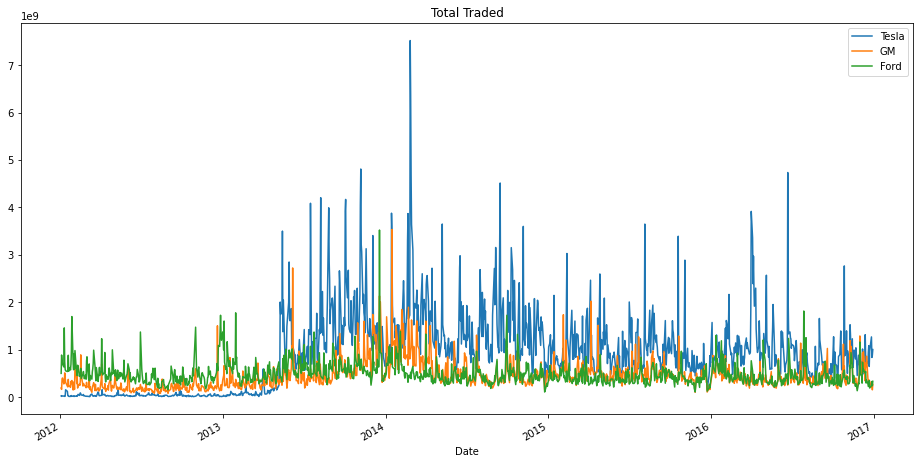

In [16]:
tesla['Total Traded'].plot(label='Tesla', figsize=(16, 8), title='Total Traded')
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')

plt.legend()

In [17]:
tesla.index[tesla['Total Traded'].argmax()]

Timestamp('2014-02-25 00:00:00')

<AxesSubplot:xlabel='Date'>

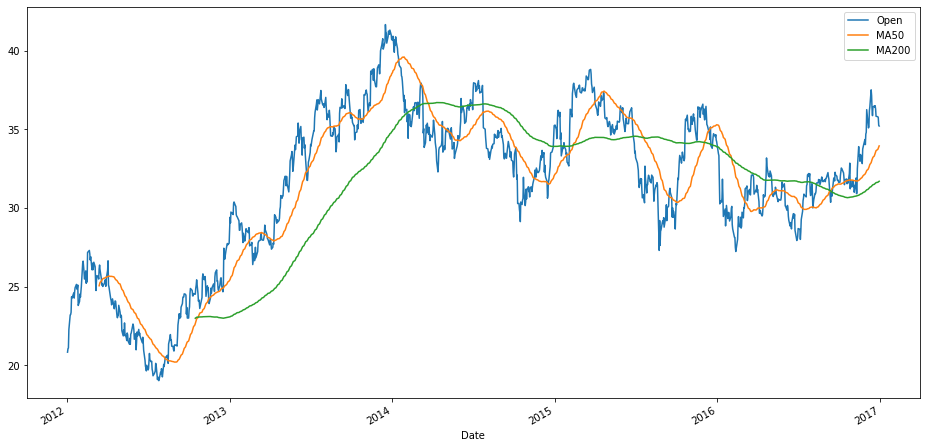

In [18]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open', 'MA50', 'MA200']].plot(figsize=(16, 8))

In [19]:
from pandas.plotting import scatter_matrix

car_comp = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis=1)

In [20]:
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']

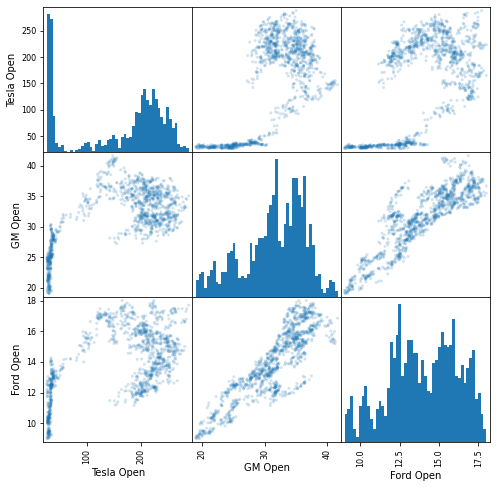

In [21]:
scatter_matrix(car_comp, figsize=(8, 8), 
               alpha=0.2, hist_kwds={'bins':50});

In [22]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

/Users/nathzi1505/Desktop/Private/Online-Courses/Algorithmic-Trading/Course_Notebooks/venv/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [23]:
ford_reset = ford.loc['2012-01'].reset_index()

In [24]:
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          20 non-null     datetime64[ns]
 1   High          20 non-null     float64       
 2   Low           20 non-null     float64       
 3   Open          20 non-null     float64       
 4   Close         20 non-null     float64       
 5   Volume        20 non-null     float64       
 6   Adj Close     20 non-null     float64       
 7   Total Traded  20 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.4 KB


In [25]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))

In [26]:
ford_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,date_ax
0,2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.836860,5.028089e+08,15342.0
1,2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.956559,8.889359e+08,15343.0
2,2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.160754,7.690521e+08,15344.0
3,2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.245250,7.025298e+08,15345.0
4,2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.308619,6.386011e+08,15348.0


In [27]:
cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
ford_values = [tuple(vals) for vals in ford_reset[cols].values]

In [28]:
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

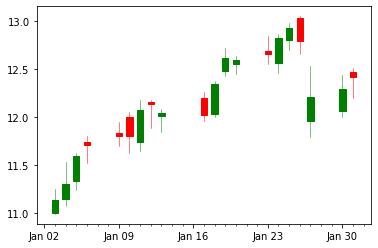

In [29]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)

ax.xaxis.set_minor_locator(alldays)

candlestick_ohlc(ax, ford_values, width=0.6, colorup='g', colordown='r');

In [30]:
# tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1)) - 1

tesla['returns'] = tesla['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

<AxesSubplot:>

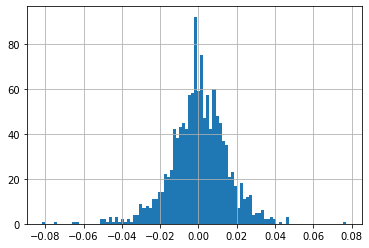

In [31]:
ford['returns'].hist(bins=100)

<AxesSubplot:>

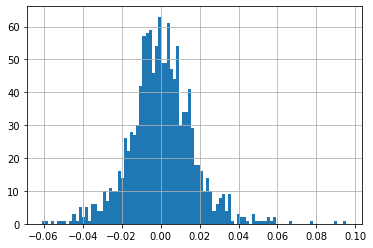

In [32]:
gm['returns'].hist(bins=100)

<AxesSubplot:>

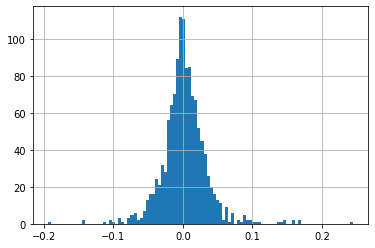

In [33]:
tesla['returns'].hist(bins=100)

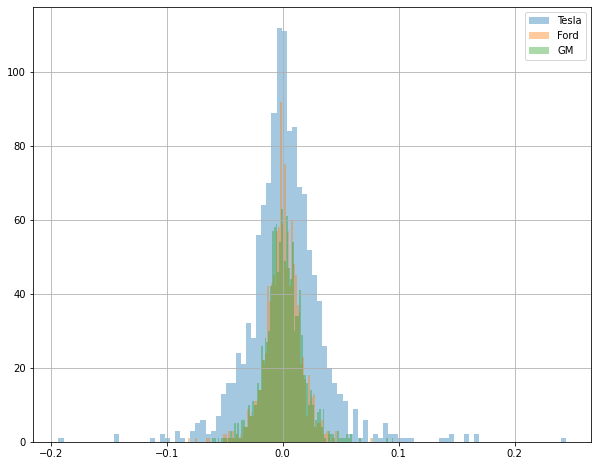

In [34]:
tesla['returns'].hist(bins=100, label='Tesla', figsize=(10, 8), alpha=0.4)
ford['returns'].hist(bins=100, label='Ford', figsize=(10, 8), alpha=0.4)
gm['returns'].hist(bins=100, label='GM', figsize=(10, 8), alpha=0.4)

plt.legend()

<AxesSubplot:ylabel='Density'>

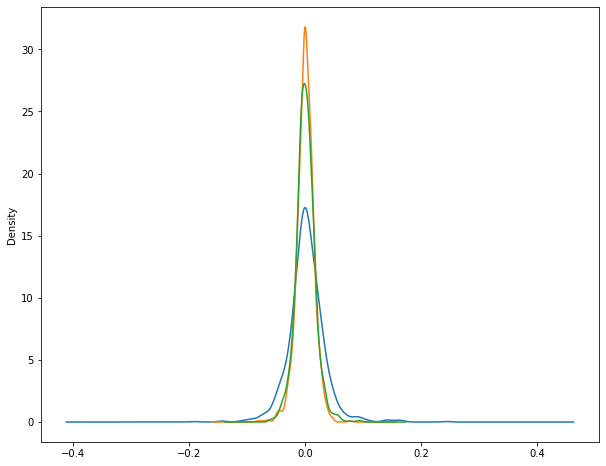

In [35]:
tesla['returns'].plot(kind='kde', label='Tesla', figsize=(10, 8))
ford['returns'].plot(kind='kde', label='Ford', figsize=(10, 8))
gm['returns'].plot(kind='kde', label='GM', figsize=(10, 8))

<AxesSubplot:>

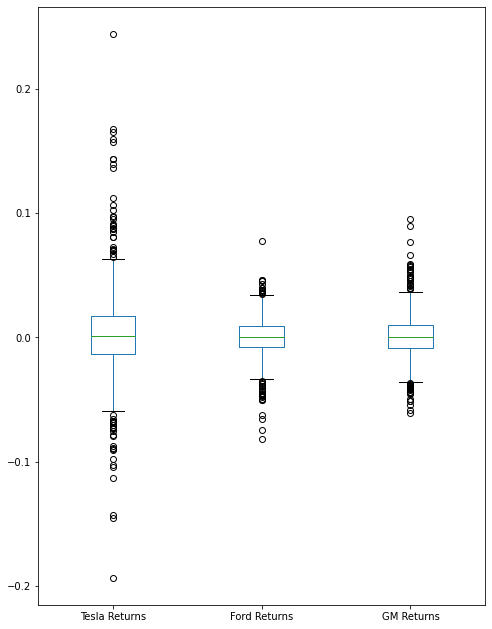

In [36]:
box_df = pd.concat([tesla['returns'], ford['returns'], gm['returns']], axis=1)
box_df.columns = ['Tesla Returns', 'Ford Returns', 'GM Returns']
box_df.plot(kind='box', figsize=(8, 11))

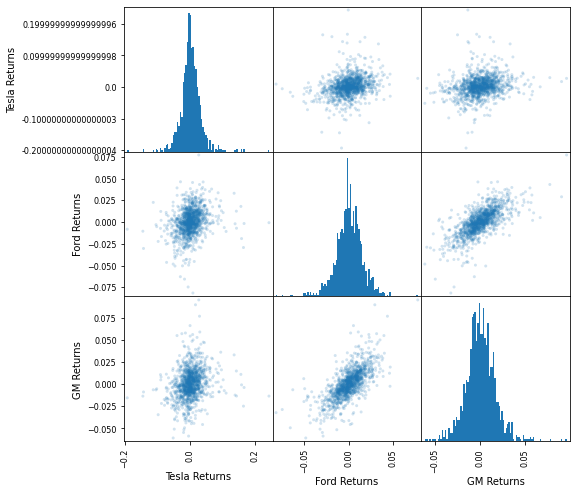

In [37]:
scatter_matrix(box_df, figsize=(8, 8), 
               alpha=0.2, hist_kwds={'bins':100});

<AxesSubplot:xlabel='Ford Returns', ylabel='GM Returns'>

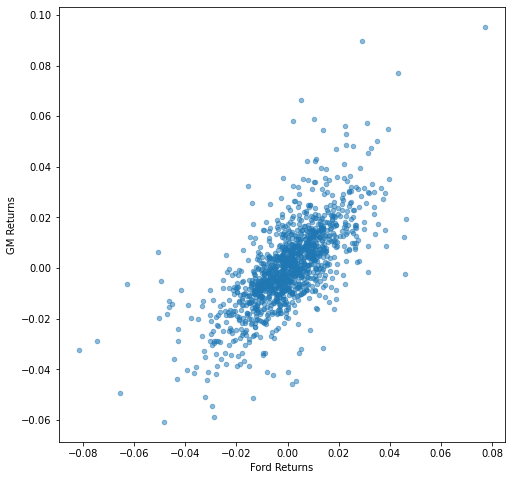

In [38]:
box_df.plot(kind='scatter', x='Ford Returns', y='GM Returns', alpha=0.5, figsize=(8,8))

In [39]:
tesla['Cumulative_Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative_Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative_Return'] = (1 + gm['returns']).cumprod()

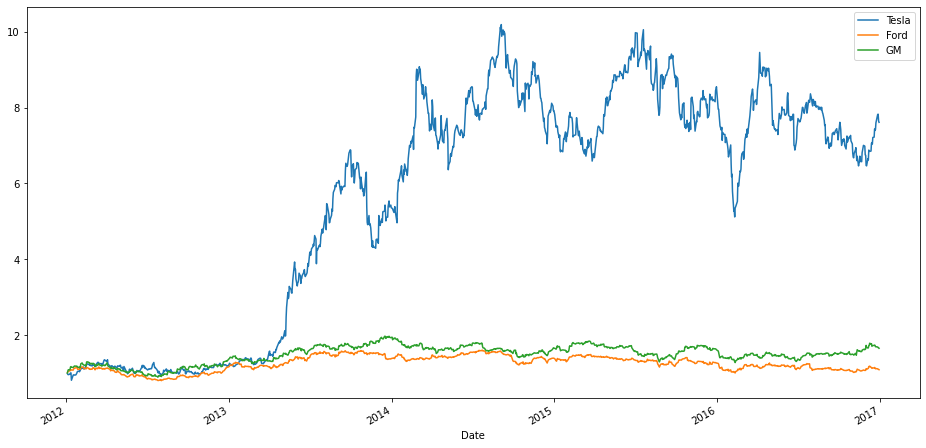

In [43]:
tesla['Cumulative_Return'].plot(label='Tesla', figsize=(16, 8))
ford['Cumulative_Return'].plot(label='Ford', figsize=(16, 8))
gm['Cumulative_Return'].plot(label='GM', figsize=(16, 8))

plt.legend()

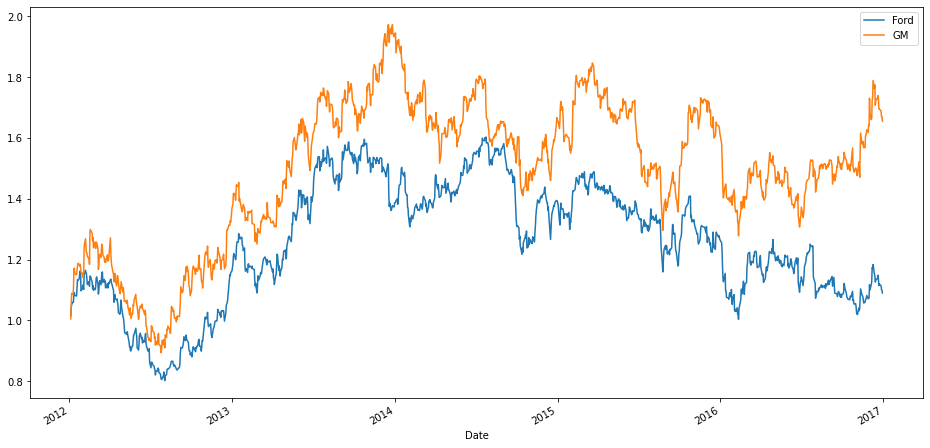

In [44]:
ford['Cumulative_Return'].plot(label='Ford', figsize=(16, 8))
gm['Cumulative_Return'].plot(label='GM', figsize=(16, 8))

plt.legend()